### Importing Libraries and Reading/Merging the Datasets

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

df1 = pd.read_csv("./resources/Mouse_metadata.csv")
df2 = pd.read_csv("./resources/Study_results.csv")
df3 = pd.merge(df1, df2, how = "inner", on = "Mouse ID" ) 
mouse_metadata = df3.drop_duplicates(subset=['Mouse ID'], keep='last') 

### Unique Mice IDs

In [216]:
Total_Mice = df3["Mouse ID"].nunique()
Total_Mice

249

In [7]:
df3["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

### Finding and Deleting Duplicate Mouse IDs

In [23]:
duplicates = df3[df3.duplicated()]["Mouse ID"]
duplicates

909    g989
Name: Mouse ID, dtype: object

In [26]:
duplicate_mouse = df3[df3["Mouse ID"].str.contains('g989')]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
mouse_metadata = df3.drop(df3[df3["Mouse ID"] == "g989"].index)

### Updated DataFrame w/o Duplicates

In [34]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Number of Mice after cleaning Duplicates

In [38]:
mouse_metadata["Mouse ID"].nunique()

248

### Summary Statistics 

In [819]:
Mice_Mean = df3.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Mice_Median = df3.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Mice_Variance = df3.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Mice_Std_Dev = df3.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Mice_Std_Err= df3.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


Mice_Men = pd.concat([Mice_Mean, Mice_Median, Mice_Variance,Mice_Std_Dev, Mice_Std_Err],
            keys=['Mean','Median', 'Variance','Standard Deviation', 'Standard Error'], axis = 1)

Mice_Men

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar Charts 

In [101]:
mice_by_drug = mouse_metadata.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_by_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0.5, 1.0, 'Mice Bar Graph 1')

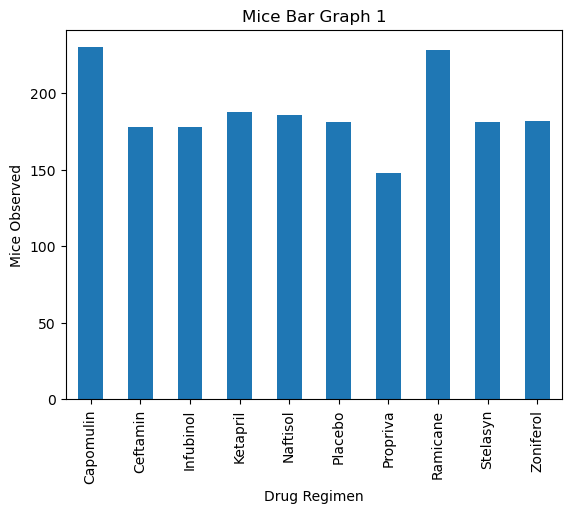

In [103]:
panda_plot = mice_by_drug.plot.bar()
panda_plot.set_xlabel("Drug Regimen")
panda_plot.set_ylabel("Mice Observed")
panda_plot.set_title("Mice Bar Graph 1")

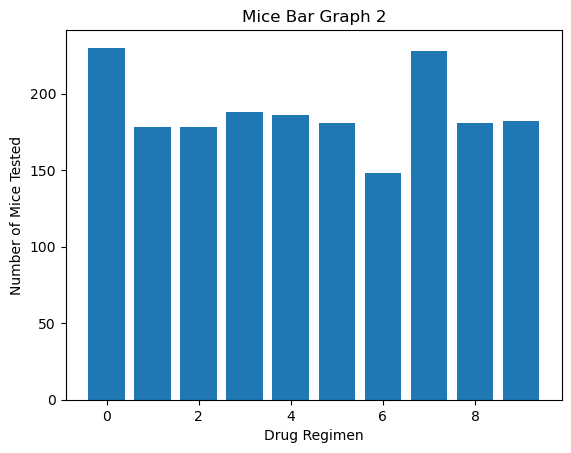

In [107]:
Regimens = mouse_metadata["Drug Regimen"].unique()
Regimens.sort() 

x_axis = np.arange(len(mice_by_drug))
plt.bar(x_axis, mice_by_drug, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Mice Bar Graph 2")
plt.show()

### Pie Charts

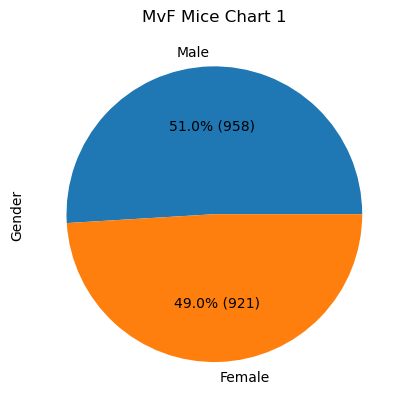

In [86]:
counts = mouse_metadata['Sex'].value_counts()
counts.plot(kind='pie', autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*counts.sum())})')
plt.title('MvF Mice Chart 1')
plt.ylabel('Gender')
plt.show()

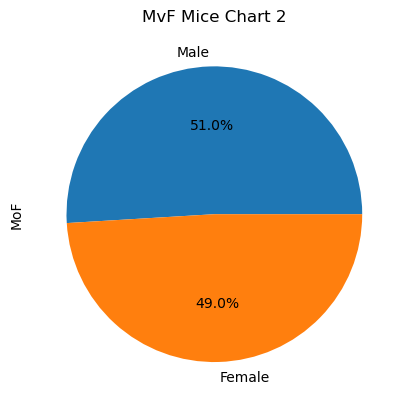

In [96]:
labels = ["Male", "Female"]
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('MvF Mice Chart 2')
plt.ylabel("MoF")
plt.show()

### Quartiles, Outliers and Box Plots 

In [109]:
# Finding the final tumor volume for each Mouse by Drug Regimen 

final_volume = mouse_metadata[(mouse_metadata["Timepoint"] == 45)]
final_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [117]:
mouse_metadata2 = pd.merge(mouse_metadata, final_volume)
mouse_metadata2.set_index('Mouse ID')

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y865,Ceftamin,Male,23,26,45,64.729837,3
z581,Infubinol,Female,24,25,45,62.754451,3


In [119]:
Capomulin = mouse_metadata2[mouse_metadata2["Drug Regimen"] == "Capomulin"]
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
9,u364,Capomulin,Male,18,17,45,31.023923,3
11,y793,Capomulin,Male,17,17,45,31.896238,2
12,r554,Capomulin,Female,8,17,45,32.377357,3
13,m957,Capomulin,Female,3,19,45,33.329098,1
15,t565,Capomulin,Female,20,17,45,34.455298,0
19,i738,Capomulin,Female,23,20,45,37.311846,2
21,w914,Capomulin,Male,24,21,45,36.041047,2


In [123]:
Capomulin = mouse_metadata2[mouse_metadata2["Drug Regimen"] == "Capomulin"].set_index('Mouse ID')
Capomulin_volume = Capomulin["Tumor Volume (mm3)"]
Capomulin_volume

Mouse ID
s185    23.343598
x401    28.484033
m601    28.430964
u364    31.023923
y793    31.896238
r554    32.377357
m957    33.329098
t565    34.455298
i738    37.311846
w914    36.041047
g288    37.074024
l897    38.846876
b742    38.939633
b128    38.982878
j119    38.125164
v923    40.658124
g316    40.159220
s710    40.728578
l509    41.483008
r944    41.581521
i557    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [125]:
Ramicane = mouse_metadata2[mouse_metadata2["Drug Regimen"] == "Ramicane"].set_index('Mouse ID')
Ramicane_volume = Ramicane["Tumor Volume (mm3)"]
Ramicane_volume

Mouse ID
k403    22.050126
g791    29.128472
s508    30.276232
m546    30.564625
z578    30.638696
j913    31.560470
n364    31.095335
c758    33.397653
a644    32.978522
i177    33.562402
j989    36.134852
a520    38.810366
r811    37.225650
i334    36.374510
d251    37.311236
a411    38.407618
e662    40.659006
u196    40.667713
q597    45.220869
a444    43.047543
Name: Tumor Volume (mm3), dtype: float64

In [127]:
Infubinol = mouse_metadata2[mouse_metadata2["Drug Regimen"] == "Infubinol"].set_index('Mouse ID')
Infubinol_volume = Infubinol["Tumor Volume (mm3)"]
Infubinol_volume

Mouse ID
a203    67.973419
a251    65.525743
a685    66.083066
c139    72.226731
e476    62.435404
f345    60.918767
k483    66.196912
y163    67.685569
z581    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [129]:
Ceftamin = mouse_metadata2[mouse_metadata2["Drug Regimen"] == "Ceftamin"].set_index('Mouse ID')
Ceftamin_volume = Ceftamin["Tumor Volume (mm3)"]
Ceftamin_volume

Mouse ID
a275    62.999356
j296    61.849023
k210    68.923185
l471    67.748662
l661    59.851956
l733    64.299830
o287    59.741901
p438    61.433892
w151    67.527482
x581    64.634949
x822    61.386660
y769    68.594745
y865    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [187]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regiments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
Drug_Regiments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

    
capomulin_quartiles = Capomulin_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

ramicane_quartiles = Ramicane_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

infubinol_quartiles = Infubinol_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

ceftamin_quartiles = Ceftamin_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Capomulin IQR is: {round(capomulin_iqr,2)}")
print(f"Capomulin values below: {round(capomulin_lower_bound,2)} are outliers")
print(f"Capomulin values above: {round(capomulin_upper_bound,2)} are outliers")
print(f"Ramicane IQR is: {round(ramicane_iqr,2)}")
print(f"Ramicane values below: {round(ramicane_lower_bound,2)} are outliers")
print(f"Ramicane values above: {round(ramicane_upper_bound,2)} are outliers")
print(f"Infubinol IQR is: {round(infubinol_iqr,2)}")
print(f"Infubinol values below: {round(infubinol_lower_bound,2)} are outliers")
print(f"Infubinol values above: {round(infubinol_upper_bound,2)} are outliers")
print(f"Ceftamin IQR is: {round(ceftamin_iqr,2)}")
print(f"Ceftamin values below: {round(ceftamin_lower_bound,2)} are outliers")
print(f"Ceftamin values above: {round(ceftamin_upper_bound,2)} are outliers")

    

Capomulin IQR is: 7.78
Capomulin values below: 20.7 are outliers
Capomulin values above: 51.83 are outliers
Ramicane IQR is: 7.53
Ramicane values below: 19.69 are outliers
Ramicane values above: 49.8 are outliers
Infubinol IQR is: 4.93
Infubinol values below: 55.36 are outliers
Infubinol values above: 75.08 are outliers
Ceftamin IQR is: 6.09
Ceftamin values below: 52.29 are outliers
Ceftamin values above: 76.67 are outliers


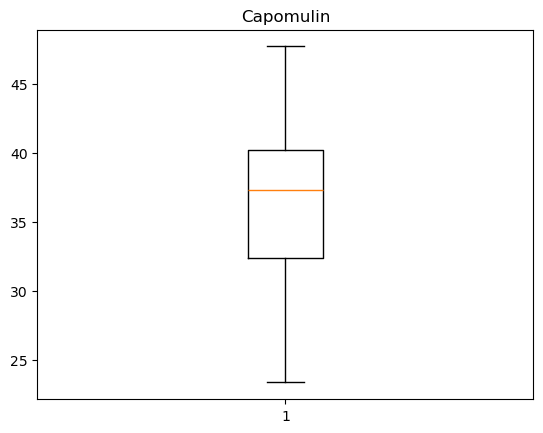

In [183]:
Capomulin_BP = list(Capomulin_volume)
fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin")
ax1.boxplot(Capomulin_BP)
plt.show()

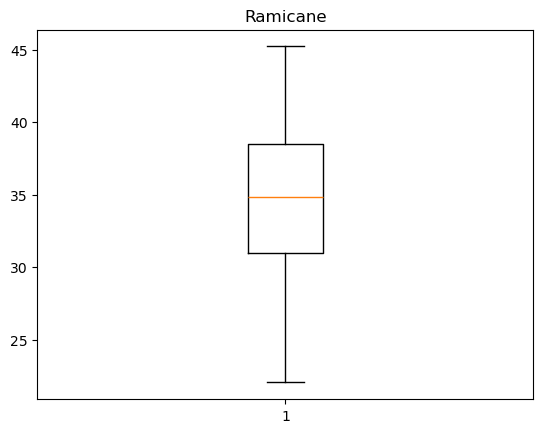

In [181]:
Ramicane_BP = list(Ramicane_volume)
fig1, ax1 = plt.subplots()
ax1.set_title("Ramicane")
ax1.boxplot(Ramicane_BP)
plt.show()

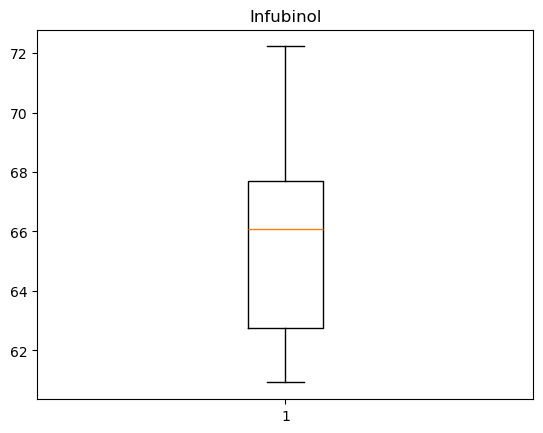

In [179]:
Infubinol_BP = list(Infubinol_volume)
fig1, ax1 = plt.subplots()
ax1.set_title("Infubinol")
ax1.boxplot(Infubinol_BP)
plt.show()

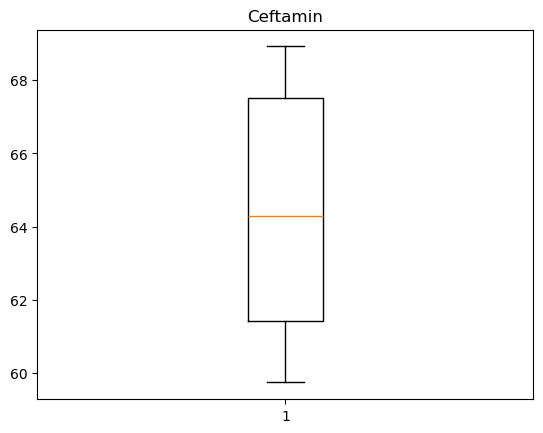

In [177]:
Ceftamin_BP = list(Ceftamin_volume)
fig1, ax1 = plt.subplots()
ax1.set_title("Ceftamin")
ax1.boxplot(Ceftamin_BP)
plt.show()

[Text(1, 0, 'Capomuln'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

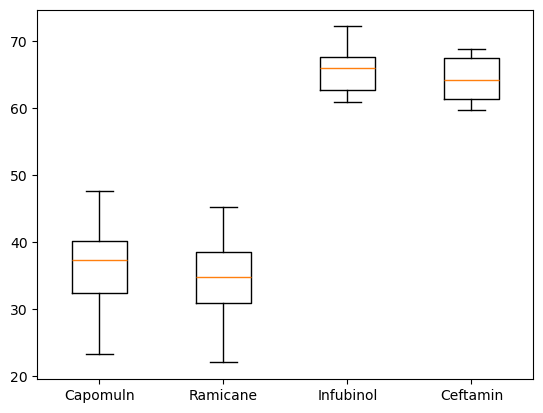

In [195]:
Final_BPs = {'Capomuln' : Capomulin_BP,'Ramicane': Ramicane_BP, 'Infubinol': Infubinol_BP ,'Ceftamin': Ceftamin_BP}

fig, ax = plt.subplots()
ax.boxplot(Final_BPs.values())
ax.set_xticklabels(Final_BPs.keys())

### Line Plots and Scatter Plots

In [210]:
Capomulin_df = mouse_metadata2[mouse_metadata2['Drug Regimen'] == 'Capomulin']
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
9,u364,Capomulin,Male,18,17,45,31.023923,3
11,y793,Capomulin,Male,17,17,45,31.896238,2
12,r554,Capomulin,Female,8,17,45,32.377357,3
13,m957,Capomulin,Female,3,19,45,33.329098,1
15,t565,Capomulin,Female,20,17,45,34.455298,0
19,i738,Capomulin,Female,23,20,45,37.311846,2
21,w914,Capomulin,Male,24,21,45,36.041047,2


In [220]:
#Single Mouse Data

mouse_r944 = df3[df3['Mouse ID']  == 'r944']
mouse_r944

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
381,r944,Capomulin,Male,12,25,0,45.000000,0
382,r944,Capomulin,Male,12,25,5,45.737145,0
383,r944,Capomulin,Male,12,25,10,46.544292,0
384,r944,Capomulin,Male,12,25,15,47.373423,0
385,r944,Capomulin,Male,12,25,20,43.225671,1
386,r944,Capomulin,Male,12,25,25,41.086991,1
387,r944,Capomulin,Male,12,25,30,41.680791,1
388,r944,Capomulin,Male,12,25,35,40.401765,2
389,r944,Capomulin,Male,12,25,40,41.042045,2
390,r944,Capomulin,Male,12,25,45,41.581521,2


In [232]:
x_axis_data = list(mouse_r944['Timepoint'])
x_axis_data

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [228]:
x_axis_data = list(mouse_r944['Timepoint'])
y_axis_data = list(mouse_r944['Tumor Volume (mm3)'])

x_axis_data
#y_axis_data


[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [234]:
y_axis_data = list(mouse_r944['Tumor Volume (mm3)'])

y_axis_data

[45.0,
 45.73714484,
 46.54429202,
 47.37342325,
 43.22567119,
 41.08699106,
 41.68079111,
 40.40176542,
 41.0420449,
 41.58152074]

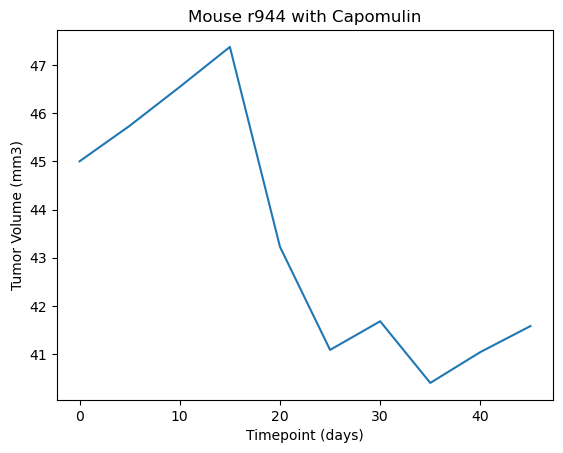

In [238]:
plt.plot(x_axis_data,y_axis_data)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse r944 with Capomulin")
plt.show()

In [262]:
Capomulin_df = df3[df3["Drug Regimen"] == "Capomulin"]
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [286]:
avg_Vol_Capomulin = Capomulin_df.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
avg_Vol_Capomulin

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [288]:
x_axis = avg_Vol_Capomulin.keys()
x_axis

Index([15, 17, 19, 20, 21, 22, 23, 24, 25], dtype='int64', name='Weight (g)')

In [290]:
y_axis = list(avg_Vol_Capomulin)
y_axis

[36.182039562,
 37.21413250092308,
 41.182391363,
 39.14105275,
 42.08870003395833,
 43.288489764999994,
 43.34105084869565,
 44.805809685,
 44.06210875428571]

Text(0, 0.5, 'Average Volume (mm3)')

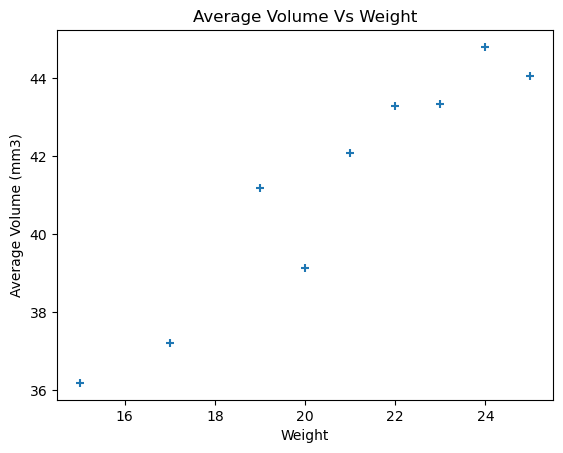

In [318]:
plt.scatter(x_axis, y_axis, marker="+")
plt.title("Average Volume Vs Weight")
plt.xlabel("Weight")
plt.ylabel("Average Volume (mm3)")

In [326]:
from scipy.stats import linregress

The r-value is:0.95


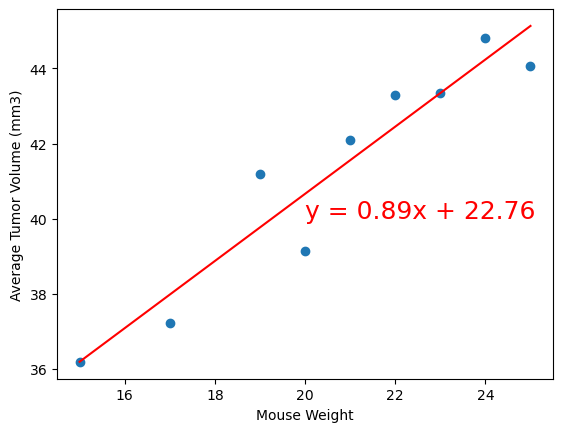

In [344]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=18,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-value is:{round(rvalue,2)}")
plt.show()